Short exploratory data analysis of a Hepatitis C data set. The original dataset can be found here https://www.kaggle.com/fedesoriano/hepatitis-c-dataset

The analysis shows a correlation map between protein levels for several different proteins and whether or not the patient has disease.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [10]:
df = pd.read_csv("HepatitisCData.csv")

In [11]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [18]:
df.shape

(615, 14)

In [19]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [27]:
df['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [28]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [34]:
df = df[df['Category'] != '0s=suspect Blood Donor']
df = df.dropna()

In [35]:
df['has_dis'] = df['Category'].apply(lambda x: 0 if '0=Blood Donor' in x else 1)

In [49]:
bio_data = ['ALB','ALP','ALT','AST','BIL', 'CHE','CHOL','CREA', 'GGT','PROT']
num_data = ['Age','ALB','ALP','ALT','AST','BIL', 'CHE','CHOL','CREA', 'GGT','PROT','has_dis']

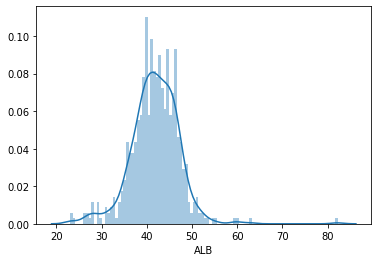

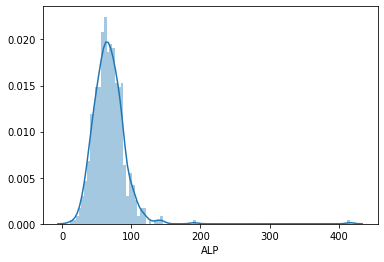

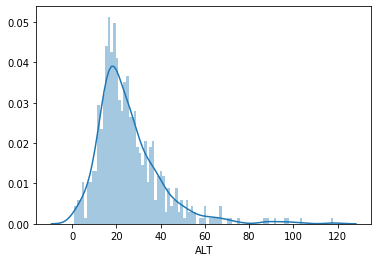

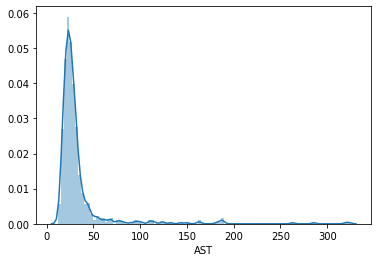

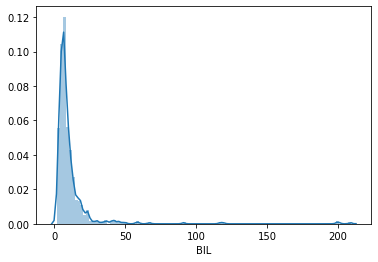

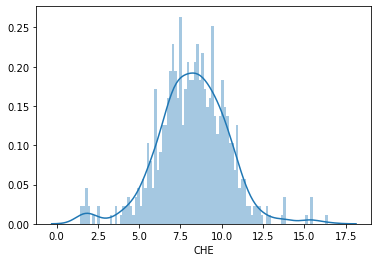

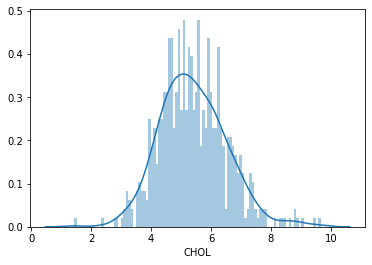

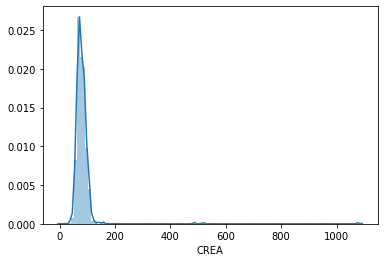

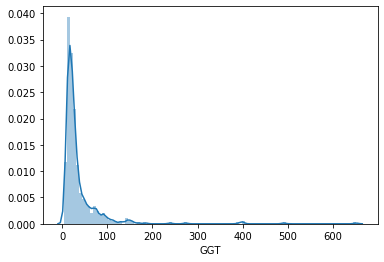

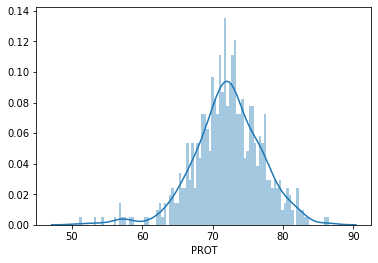

In [93]:
for i, col in enumerate(bio_data):
    plt.figure(i)
    sns.distplot(df[col], bins =100)

In [51]:
df[num_data].corr()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,has_dis
Age,1.000000,-0.161481,0.170215,-0.111697,0.055230,0.043339,-0.081921,0.146815,-0.014499,0.129556,-0.126691,0.037512
ALB,-0.161481,1.000000,-0.103431,0.200235,-0.161389,-0.194822,0.364617,0.167053,-0.018850,-0.073379,0.493732,-0.203710
ALP,0.170215,-0.103431,1.000000,0.078155,0.027222,0.066974,0.043800,0.135502,0.167393,0.428599,-0.014861,-0.062378
ALT,-0.111697,0.200235,0.078155,1.000000,0.100191,-0.126918,0.311920,0.184870,-0.024710,0.102898,0.146857,-0.233696
AST,0.055230,-0.161389,0.027222,0.100191,1.000000,0.321066,-0.224441,-0.211018,-0.009114,0.481591,0.048419,0.645313
BIL,0.043339,-0.194822,0.066974,-0.126918,0.321066,1.000000,-0.330494,-0.187060,0.019625,0.234191,-0.071996,0.442584
CHE,-0.081921,0.364617,0.043800,0.311920,-0.224441,-0.330494,1.000000,0.428312,-0.013163,-0.074410,0.297580,-0.248236
CHOL,0.146815,0.167053,0.135502,0.184870,-0.211018,-0.187060,0.428312,1.000000,-0.060087,0.031976,0.201525,-0.252205
CREA,-0.014499,-0.018850,0.167393,-0.024710,-0.009114,0.019625,-0.013163,-0.060087,1.000000,0.128460,-0.061710,0.166441
GGT,0.129556,-0.073379,0.428599,0.102898,0.481591,0.234191,-0.074410,0.031976,0.128460,1.000000,0.049717,0.461679


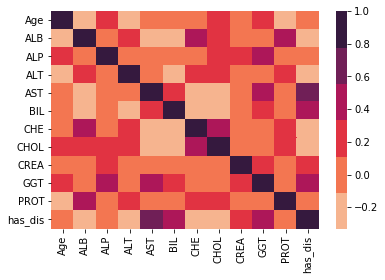

In [73]:
cmap = sns.color_palette("rocket_r")
sns.heatmap(df[num_data].corr(), cmap=cmap)

In [74]:
data_scaled = scaler.fit_transform(df[['ALB', 'ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']])

In [75]:
scaleddf = pd.DataFrame(data_scaled, columns=['ALB', 'ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT'])

In [76]:
scaleddf.describe()

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,0.318099,0.139037,0.211321,0.068350,0.044857,0.453125,0.482117,0.069003,0.050024,0.594545
std,0.090697,0.062050,0.127311,0.103709,0.084432,0.143540,0.135306,0.047306,0.079532,0.136841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.270270,0.101653,0.131613,0.030208,0.016892,0.368913,0.388350,0.056017,0.016940,0.515493
50%,0.320101,0.134962,0.184300,0.043590,0.025820,0.456638,0.470874,0.064420,0.028079,0.594366
75%,0.374578,0.167777,0.263225,0.062821,0.044402,0.543362,0.565231,0.075623,0.049041,0.681690
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
scaleddf['Age'] = df['Age']
scaleddf['has_dis'] = df['has_dis']

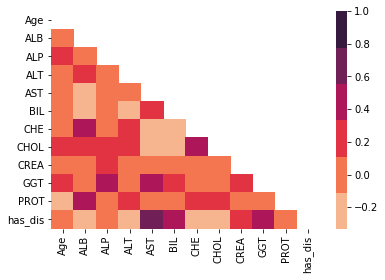

In [95]:
mask = np.triu(scaleddf[num_data].corr())
sns.heatmap(scaleddf[num_data].corr(),mask=mask, cmap=cmap)